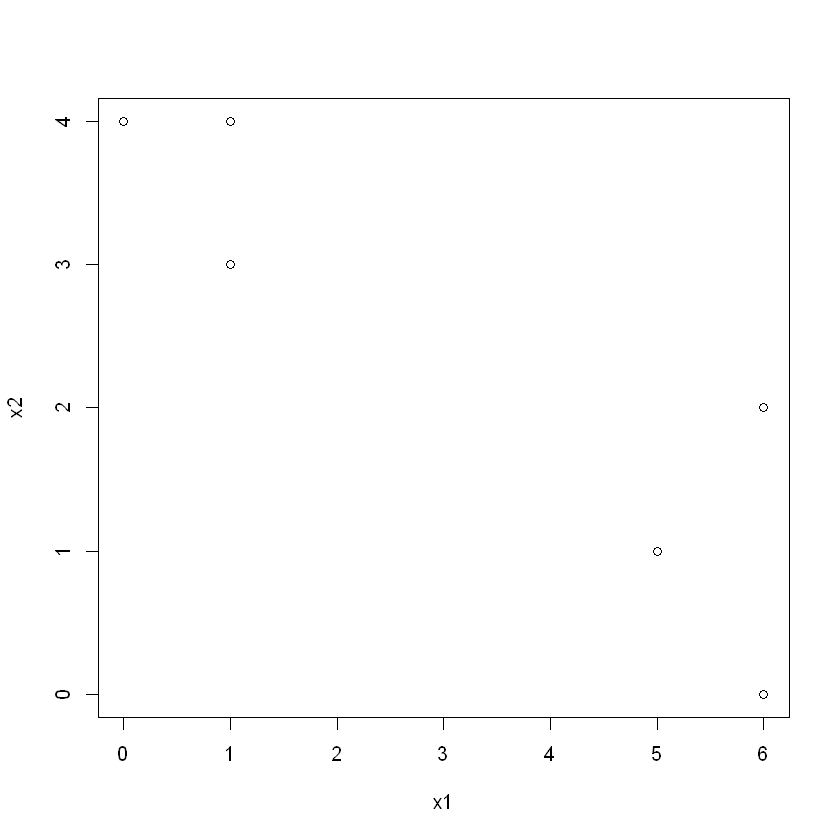

In [1]:
#ex 3(p.414)

x1 <-c(1,1,0,5,6,6)
x2<- c(4,3,4,1,2,0)

plot(x1,x2)

In [19]:
#b
labels = sample(1:2, 6, replace=T)

x<- data.frame(cbind(x1, x2,labels))
head(x)

x1,x2,labels
1,4,1
1,3,1
0,4,2
5,1,2
6,2,1
6,0,2


[1] 2.666667 3.000000

[1] 3.666667 1.666667

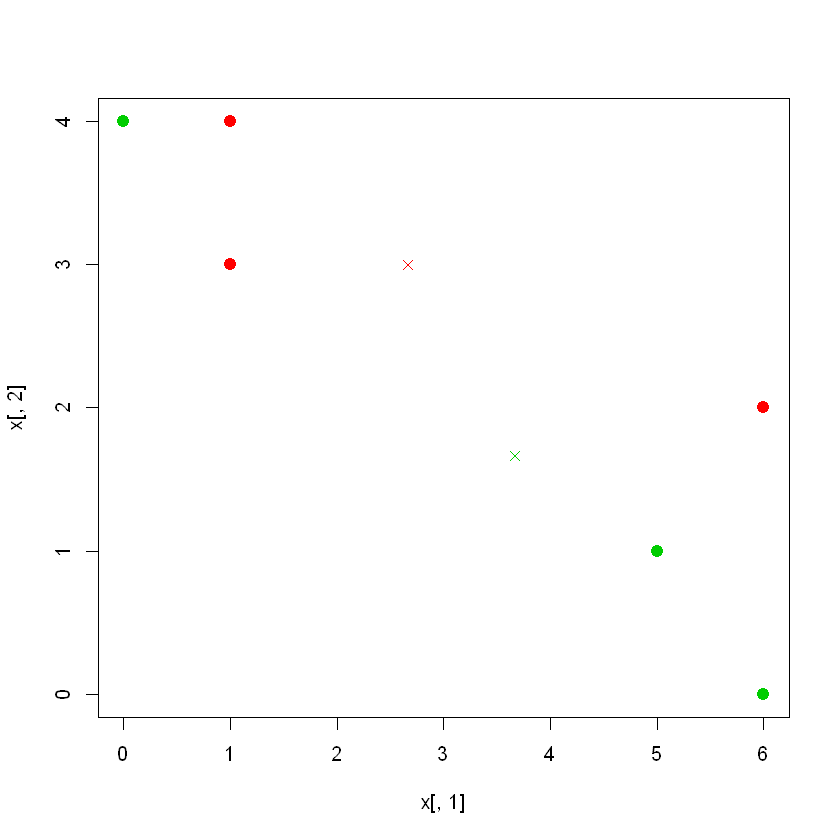

In [20]:
#C
centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
centroid1
centroid2
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [8]:
x

1,4
1,3
0,4
5,1
6,2
4,0


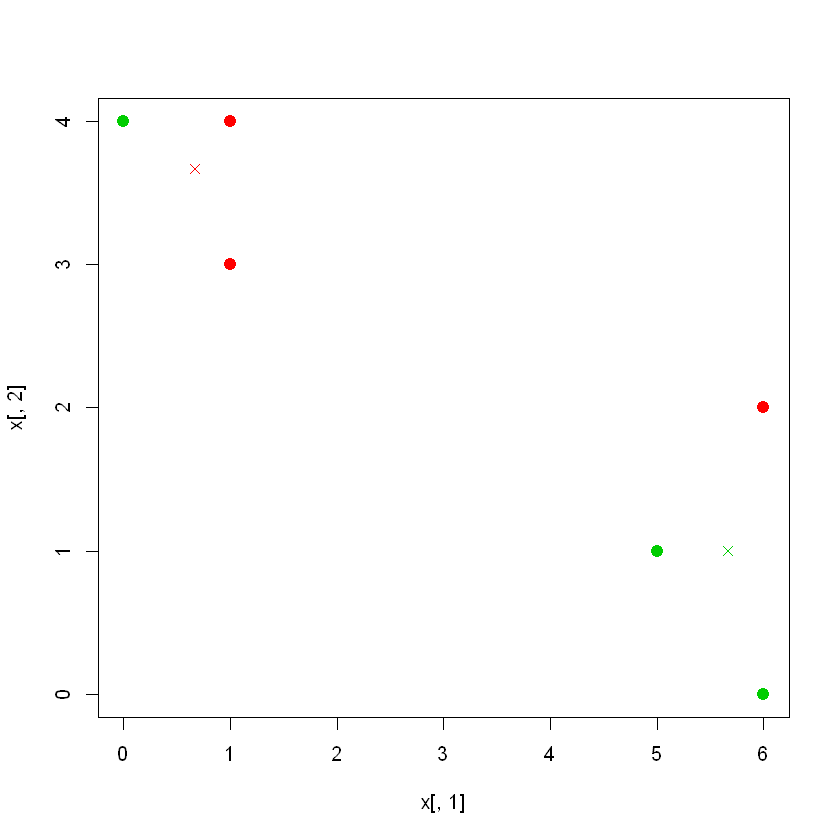

In [22]:
#D
x$clust <-c(1,1,1,2,2,2)
centroid1 = c(mean(x$x1[x$clust==1]), mean(x$x2[x$clust==1]))
centroid2 = c(mean(x$x1[x$clust==2]), mean(x$x2[x$clust==2]))
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [ ]:
#E 


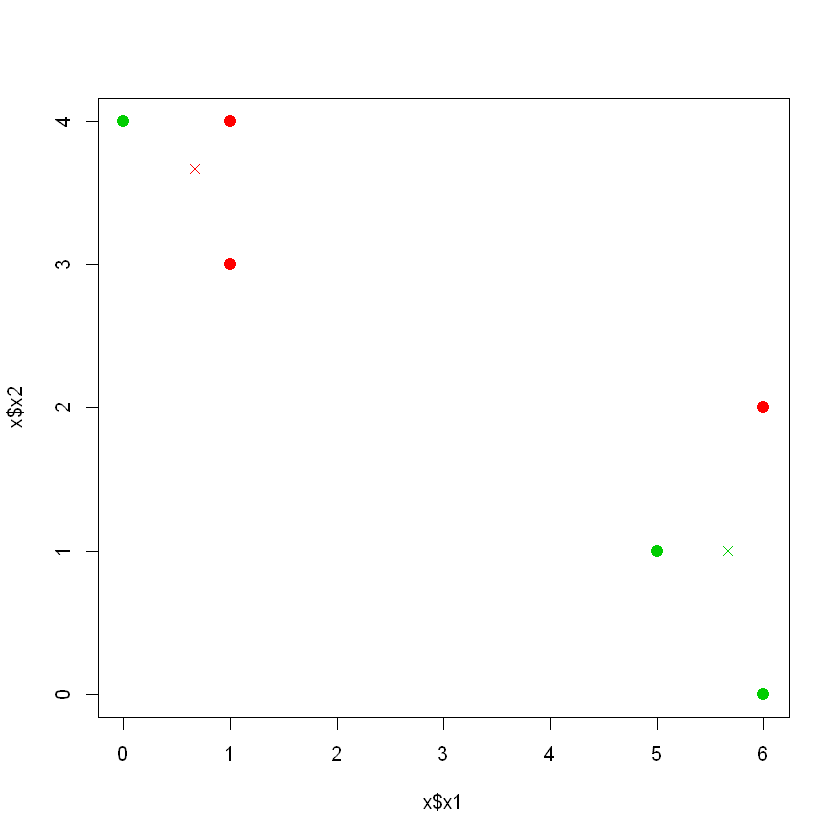

In [23]:
#F
plot(x$x1, x$x2, col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [27]:
pr.out = prcomp(USArrests, center=T, scale=T)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve
pr.out

[1] 0.62006039 0.24744129 0.08914080 0.04335752

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

In [31]:
loadings = pr.out$rotation
pve2 = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

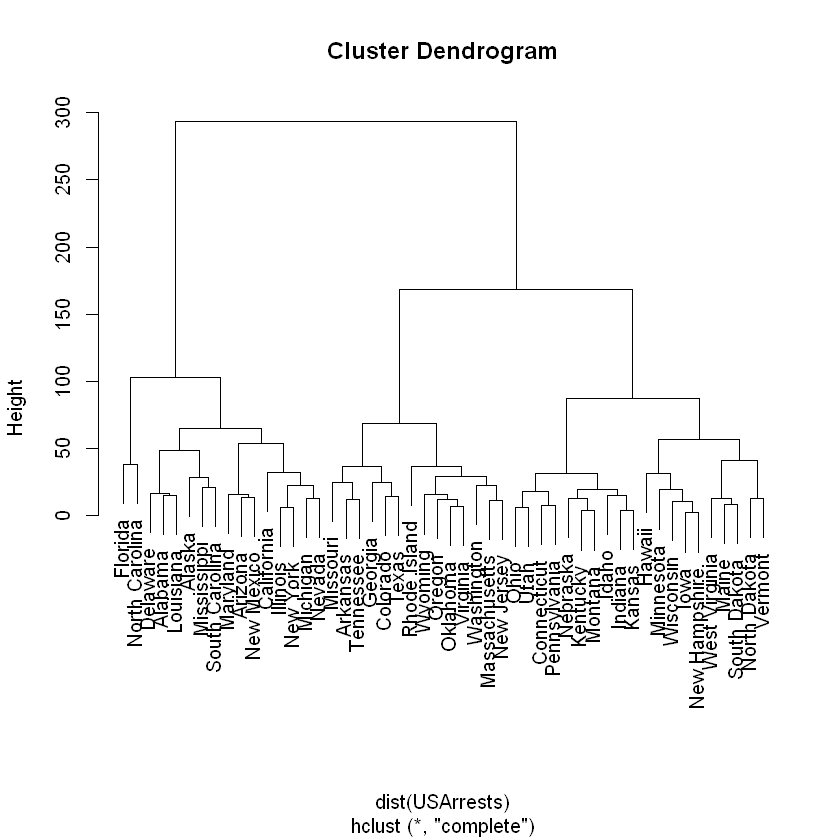

In [33]:
#EX9 
#A
hc.complete = hclust(dist(USArrests), method="complete")
plot(hc.complete)

In [34]:
#b
cutree(hc.complete, 3)


Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

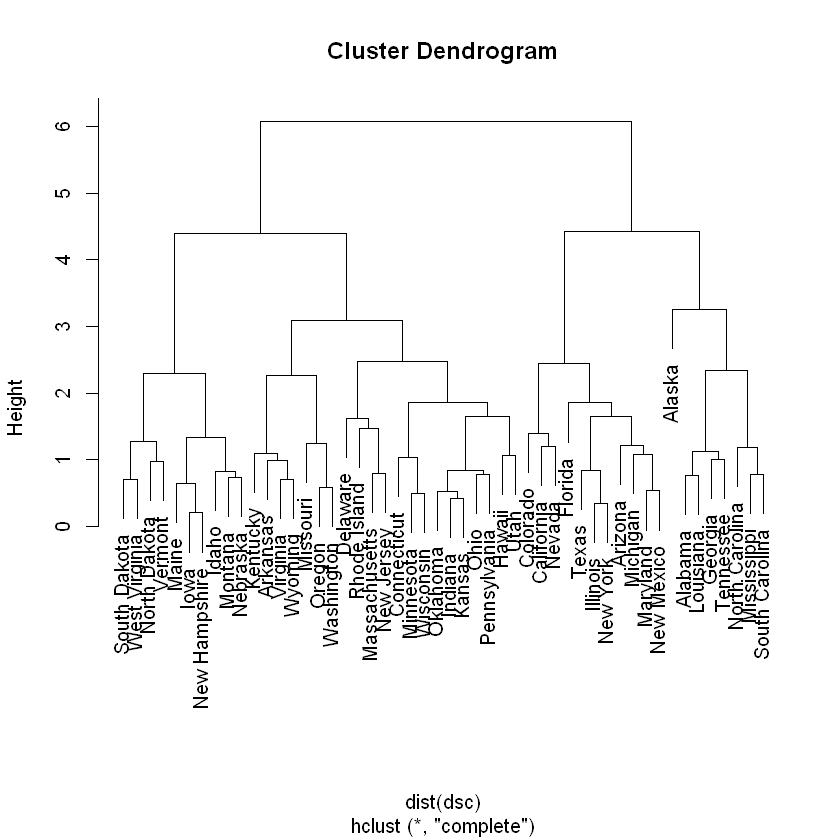

In [35]:
#c
dsc = scale(USArrests)
hc.s.complete = hclust(dist(dsc), method="complete")
plot(hc.s.complete)

In [36]:
#d
#you don't need to scale if the variables are on the same scale and the distances are comparable
#in this case they are on different scales and have also different variances, so scaling makes sense in this case
#

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [38]:
#ex10 
#A
set.seed(123)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1
x

-5.604756e-04,1.000000e+00,1.176466e-04,-1.063326e-03,-7.886220e-04,-7.152422e-04,-2.052993e-04,1.779503e-03,2.045071e-05,-2.732481e-04,...,-4.831351e-04,1.390366e-05,1.242999e-03,1.206196e-03,-1.259027e-03,-2.006120e-03,-6.452325e-04,-1.073997e-04,-1.072825e-03,6.966287e-04
-2.301775e-04,1.000000e+00,-9.474746e-04,1.263185e-03,-5.021987e-04,-7.526890e-04,6.511933e-04,2.864244e-04,3.140577e-04,-4.686998e-04,...,-5.313469e-04,-5.162160e-04,1.982210e-03,-8.459094e-05,2.574082e-04,-2.058264e-04,-2.341175e-04,-1.385558e-03,-2.298288e-04,-6.598146e-05
1.558708e-03,1.000000e+00,-4.905574e-04,-3.496504e-04,1.496061e-03,-9.385387e-04,2.737665e-04,1.263159e-04,1.328215e-03,7.041673e-04,...,-5.876848e-04,-1.190543e-03,-6.464418e-04,5.632623e-04,-8.242933e-04,-1.649057e-03,-1.108161e-03,-5.921406e-04,6.216372e-04,-1.343480e-04
7.050839e-05,1.000000e+00,-2.560922e-04,-8.655129e-04,-1.137304e-03,-1.052513e-03,1.024673e-03,1.272267e-03,1.213184e-04,-1.197364e-03,...,-4.116979e-04,-4.130692e-04,9.661893e-04,5.281944e-04,-1.060624e-03,-1.530787e-05,-2.732242e-04,-1.105334e-03,8.374455e-04,1.654741e-03
1.292877e-04,1.000000e+00,1.843862e-03,-2.362796e-04,-1.790516e-04,-4.371595e-04,8.176594e-04,-7.184662e-04,7.128423e-04,8.663661e-04,...,7.091856e-04,3.719949e-04,-1.427267e-03,4.230384e-04,7.255055e-04,-8.949017e-04,-1.133441e-03,1.039089e-03,-3.028880e-04,3.718949e-04
1.715065e-03,1.000000e+00,-6.519499e-04,-1.971759e-04,1.902362e-03,3.311792e-04,-2.097932e-04,-4.503386e-04,7.788600e-04,8.641525e-04,...,2.563968e-04,9.234296e-05,-4.574838e-04,-5.967642e-04,-7.079319e-04,4.631972e-05,3.593080e-04,2.542904e-03,-1.515525e-04,6.235405e-04
4.609162e-04,1.000000e+00,2.353866e-04,1.109920e-03,-1.009749e-04,-2.014210e-03,3.781678e-04,2.397452e-03,9.147733e-04,-1.198622e-03,...,-1.856361e-03,6.934838e-04,9.454667e-04,-1.250844e-03,-1.440488e-04,4.610041e-04,3.356448e-04,-6.737158e-04,-1.628515e-04,4.748986e-04
-1.265061e-03,1.000000e+00,7.796085e-05,8.473729e-05,-1.359841e-03,2.119804e-04,-9.454088e-04,1.112919e-05,-5.743946e-04,6.394920e-04,...,-1.860588e-03,9.408992e-04,-7.383892e-04,-1.681601e-03,-9.737156e-04,-5.037388e-04,8.109844e-04,-9.223001e-05,5.784553e-05,5.716346e-04
-6.868529e-04,1.000000e+00,-9.618566e-04,7.540538e-04,-6.647694e-04,1.236675e-03,8.569230e-04,1.633568e-03,1.626881e-03,2.430227e-03,...,-2.283409e-05,8.284640e-04,3.456407e-04,-4.562964e-04,5.594443e-05,-1.022398e-03,4.164561e-04,2.797350e-04,1.537145e-03,1.335736e-03
-4.456620e-04,1.000000e+00,-7.130809e-05,-4.992920e-04,4.854600e-04,2.037574e-03,-4.610383e-04,-1.438507e-03,-3.809567e-04,-5.572155e-04,...,1.499387e-04,-3.244892e-04,-9.004447e-04,6.827932e-04,4.923466e-04,-6.117422e-04,1.594114e-03,2.708959e-03,-7.267125e-04,-5.710416e-05
1.224082e-03,1.000000e+00,1.444551e-03,2.144453e-04,-3.756029e-04,1.301176e-03,2.416773e-03,-1.905168e-04,-1.057842e-04,8.449042e-04,...,-2.307474e-03,-1.328156e-03,-3.703507e-04,-2.390375e-04,5.025453e-04,-6.673935e-04,-3.861379e-04,-2.329003e-03,-2.047627e-04,2.428439e-04


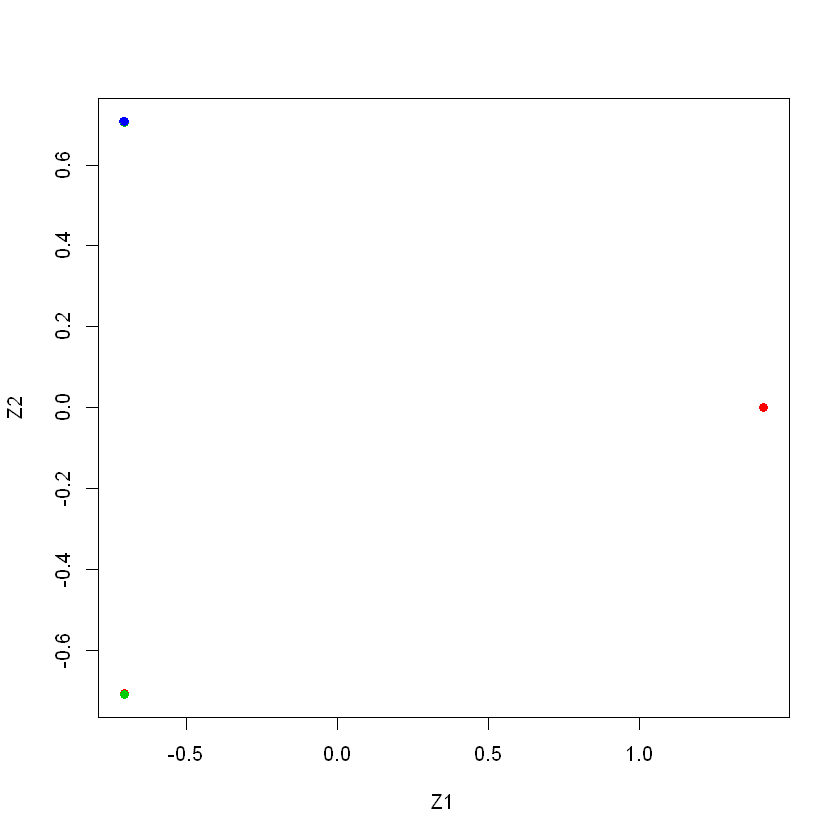

In [41]:
pca.out = prcomp(x)
plot(pca.out$x[,1:2], col=2:4, xlab="Z1", ylab="Z2", pch=19) 


In [42]:
#c
km.out = kmeans(x, 3, nstart=20)
table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20)))
#it is a match



   
     1  2  3
  1  0 20  0
  2 20  0  0
  3  0  0 20

In [43]:
km.out = kmeans(x, 2, nstart=20)
km.out$cluster
#all previous class absorbed into a single class

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [45]:
km.out = kmeans(x, 4, nstart=20)
km.out$cluster
#previous cluster slit in 2 clusters

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 3 2 2 3 3 2 2 3 2 3 3 3 2 3 3 2 3 2 2 3

In [47]:
#f
km.out = kmeans(pca.out$x[,1:2], 3, nstart=20)
table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20)))
#it match

   
     1  2  3
  1  0  0 20
  2  0 20  0
  3 20  0  0

In [48]:
km.out = kmeans(scale(x), 3, nstart=20)
km.out$cluster
#scaling has an influance on the distance

[1] 3 2 3 1 2 1 1 3 1 1 1 3 2 2 2 1 1 2 1 1 2 3 2 2 2 2 2 2 1 2 1 3 3 2 3 2 2 2
[39] 2 1 1 3 3 1 1 3 3 1 3 1 1 2 2 2 1 3 1 3 3 1